# CIFAR 10

### Dataset Description
_________________
● CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
* Airplanes
* Cars
* Birds
* Cats
* Deer
* Dogs
* Frogs
* Horses
* Ships
* Trucks
● The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

● CIFAR-10 is widely used for machine learning and computer vision applications.

● The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

● Images have low resolution (32x32).

● Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

# Import stuff

In [25]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load dataset

In [26]:
from keras.datasets import cifar10           #import any dataset like this
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #Returns Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

In [27]:
print("Train samples: ", X_train.shape, y_train.shape)
print("Test samples: ", X_test.shape, y_test.shape)

Train samples:  (50000, 32, 32, 3) (50000, 1)
Test samples:  (10000, 32, 32, 3) (10000, 1)


In [28]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
temp=0
liste=[]
for i,j in enumerate(y_train):
  if j==temp:
    liste.append(i)
    temp+=1
  if temp==10:
    break
print(liste)

[29, 32, 41, 59, 66, 70, 72, 73, 92, 102]


In [30]:
unique_images=[X_train[i] for i in liste]

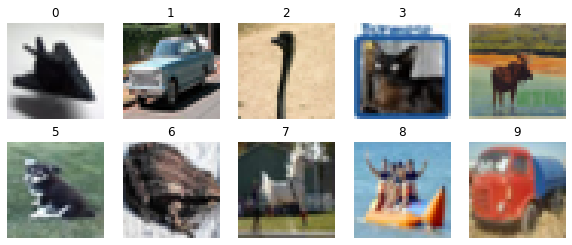

In [31]:
cols = 5
rows = 2
temp=0
fig = plt.figure(figsize=(10, 4))
for i in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(unique_images[temp])
        ax.set_title(temp)
        temp+=1

In [32]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [33]:
print('Encoded labels are: ',y_train.T,'\n')
print('Classes are : ',cifar10_classes)
#index of each element in cifar10_classes is it's integer label

Encoded labels are:  [[6 9 9 ... 9 1 1]] 

Classes are :  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Prepare data

In [34]:
# normalize inputs
X_train2 = X_train/255.0 - 0.5
X_test2 = X_test/255.0 - 0.5 

# convert class labels to one-hot encoded, should have shape (m, 10)
y_train2 = keras.utils.to_categorical(y_train,num_classes=10)
y_test2 =  keras.utils.to_categorical(y_test, num_classes=10)

In [35]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
		horizontal_flip=True,
		fill_mode="nearest")
image_gen.fit(X_train2, augment=True)

In [36]:
temp=(keras.applications.VGG19( weights='imagenet', include_top=False ,input_shape=(32,32,3)))
temp.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [37]:
def modify(model,k):
  for i,layer in enumerate(model.layers):
    layer.trainable=False
    if i==k:
      break
  return model

# Define CNN architecture

In [38]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, SpatialDropout2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD

In [39]:
def make_model():
    model = Sequential()
    model.add(Conv2D(filters=16,input_shape=(32,32,3), kernel_size=(3,3), strides=(1,1), padding = 'same'))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.5))

    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same'))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(units=256))
    model.add(Dropout(rate=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(units=10))
    
    model.add(Activation("softmax"))
    
    return model

In [40]:
model = make_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)       

# Train model

In [41]:
epochs = 30
# prepare model for fitting (loss, optimizer, etc)
#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=1),  
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return 0.01 * 0.9 ** (epoch/2)

In [42]:
# fit model
def train_model(model,data,batch_size,epochs):
  (X_train2, y_train2, X_test2, y_test2) = data
  model.fit_generator( image_gen.flow(X_train2, y_train2, batch_size=batch_size),
          steps_per_epoch = X_train.shape[0]//batch_size,
          callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],
          epochs=epochs,
          validation_data=(X_test2,y_test2),
          )
  return model

In [ ]:
batch_size = 32
epochs = 100
data = (X_train2, y_train2, X_test2, y_test2)
trained_model=train_model(model,data,batch_size,epochs)

Epoch 1/100
1562/1562 [==============================] - 11s 7ms/step - loss: 1.5669 - accuracy: 0.4345 - val_loss: 1.1570 - val_accuracy: 0.5790
Epoch 2/100
1562/1562 [==============================] - 10s 7ms/step - loss: 1.2524 - accuracy: 0.5613 - val_loss: 1.0446 - val_accuracy: 0.6305
Epoch 3/100
1562/1562 [==============================] - 10s 6ms/step - loss: 1.1564 - accuracy: 0.5947 - val_loss: 1.0122 - val_accuracy: 0.6485
Epoch 4/100
1562/1562 [==============================] - 10s 6ms/step - loss: 1.1157 - accuracy: 0.6123 - val_loss: 0.9379 - val_accuracy: 0.6754
Epoch 5/100
1562/1562 [==============================] - 10s 7ms/step - loss: 1.0795 - accuracy: 0.6241 - val_loss: 0.9878 - val_accuracy: 0.6557
Epoch 6/100
1562/1562 [==============================] - 10s 7ms/step - loss: 1.0497 - accuracy: 0.6360 - val_loss: 0.8445 - val_accuracy: 0.7053
Epoch 7/100
1562/1562 [==============================] - 10s 6ms/step - loss: 1.0164 - accuracy: 0.6478 - val_loss: 0.8466 -

# Evaluate model

In [ ]:
# make test predictions
y_pred_test = trained_model.predict_proba(X_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

Test accuracy: 0.8253


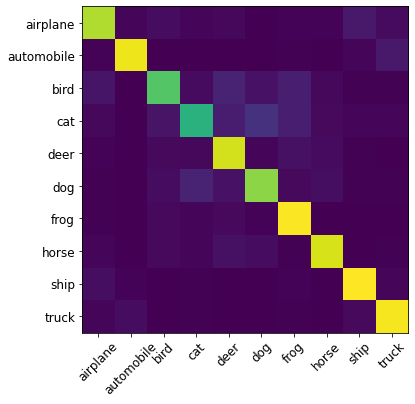

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

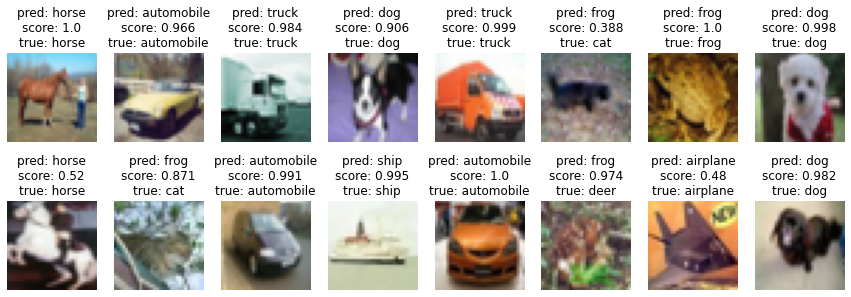

In [ ]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))

## Summary:
* Using a 4 layer convolutional network with leakyrelu activation I was able to achive an accuracy of 82.5% accuracy . 
* The loss function used is categorical_crossentropy
* I choose Adamax optimizer with decay over time